In [39]:
import numpy as np
import pandas as pd
import os
import librosa
import wave
import matplotlib.pyplot as plt

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

In [41]:
import keras
import tensorflow

In [42]:
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import *
# from keras.optimizer_v1 import rmsprop (this is showing error as package has been renamed to tensorflow .keras)

In [43]:
from tensorflow.keras.optimizers import RMSprop

In [44]:
from google.colab import drive

In [45]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [47]:
def extract_mfcc(wav_file_name):
  y,sr =librosa.load(wav_file_name)
  mfccs = np.mean(librosa.feature.mfcc(y=y,sr=sr,n_mfcc=40).T,axis=0)
  return mfccs

In [48]:
ravdess_speech_labels = []
ravdess_speech_data=[]
for dirname, _,filenames in os.walk("/content/drive/MyDrive/sppech/"):
  for filename in filenames:
    #print(os.path.join(dirname,filename))
    ravdess_speech_labels.append(int(filename[7:8]) - 1)
    wav_file_name = os.path.join(dirname,filename)
    ravdess_speech_data.append(extract_mfcc(wav_file_name))#extract mfcc features/file
print("finish loading the Dataset")

finish loading the Dataset


In [ ]:
ravdess_speech_data

In [ ]:
ravdess_speech_data_array=np.asarray(ravdess_speech_data)
ravdess_speech_label_array=np.array(ravdess_speech_labels)
ravdess_speech_label_array.shape

labels_categorical =to_categorical(ravdess_speech_label_array)
labels_categorical.shape


In [ ]:
ravdess_speech_data_array

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(np.array(ravdess_speech_data_array),labels_categorical,test_size=0.20,random_state=9)

In [ ]:
number_of_samples =ravdess_speech_data_array.shape[0]
training_samples = int(number_of_samples *0.8)
validation_samples = int(number_of_samples *0.1)
test_samples = int(number_of_samples*0.1)

In [ ]:
def create_model_LSTM():
  model = Sequential()
  model.add(LSTM(128,return_sequences=False,input_shape=(40,1)))
  model.add(Dense(64))
  model.add(Dropout(0.4))
  model.add(Activation('relu'))
  model.add(Dense(32))
  model.add(Dropout(0.4))
  model.add(Activation('relu'))
  model.add(Dense(8))
  model.add(Activation('softmax'))


  model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])
  return model


In [ ]:
w = np.expand_dims(ravdess_speech_data_array[:training_samples],-1)

In [ ]:
w.shape

In [49]:
model_A = create_model_LSTM()
history = model_A.fit(np.expand_dims(ravdess_speech_data_array[:training_samples],-1), labels_categorical[:training_samples],validation_data=(np.expand_dims(ravdess_speech_data_array[training_samples:training_samples+validation_samples],-1),labels_categorical[training_samples:training_samples+validation_samples]),epochs=130,shuffle=True)

Epoch 1/130
36/36 [==============================] - 6s 66ms/step - loss: 2.0794 - accuracy: 0.1416 - val_loss: 2.0479 - val_accuracy: 0.1748
Epoch 2/130
36/36 [==============================] - 3s 83ms/step - loss: 2.0505 - accuracy: 0.1581 - val_loss: 2.0134 - val_accuracy: 0.1958
Epoch 3/130
36/36 [==============================] - 2s 50ms/step - loss: 2.0285 - accuracy: 0.2050 - val_loss: 2.0045 - val_accuracy: 0.1888
Epoch 4/130
36/36 [==============================] - 2s 44ms/step - loss: 2.0106 - accuracy: 0.2129 - val_loss: 2.0297 - val_accuracy: 0.2238
Epoch 5/130
36/36 [==============================] - 2s 44ms/step - loss: 1.9861 - accuracy: 0.2163 - val_loss: 1.9234 - val_accuracy: 0.2308
Epoch 6/130
36/36 [==============================] - 2s 46ms/step - loss: 1.9477 - accuracy: 0.2502 - val_loss: 1.9170 - val_accuracy: 0.2028
Epoch 7/130
36/36 [==============================] - 2s 47ms/step - loss: 1.9081 - accuracy: 0.2598 - val_loss: 1.9807 - val_accuracy: 0.2028
Epoch 

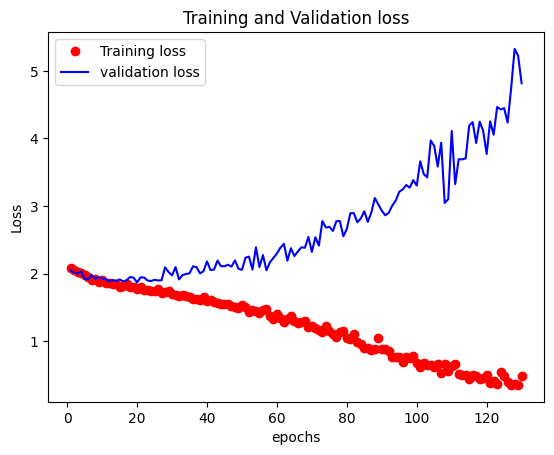

In [50]:
loss = history .history['loss']
val_loss = history.history['val_loss']

epochs =range(1,len(loss)+1)

plt.plot(epochs,loss,'ro',label='Training loss')
plt.plot(epochs,val_loss,'b',label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('epochs')
plt.ylabel('Loss')

plt.legend()

plt.show()

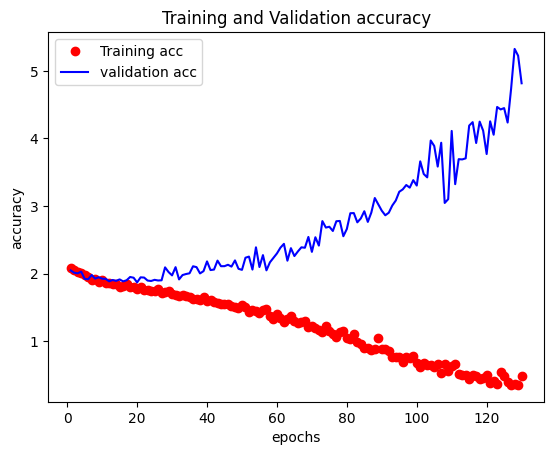

In [51]:
acc = history .history['accuracy']
val_acc = history.history['val_accuracy']


plt.plot(epochs,loss,'ro',label='Training acc')
plt.plot(epochs,val_loss,'b',label='validation acc')
plt.title('Training and Validation accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')

plt.legend()

plt.show()

In [52]:
model_A.evaluate(np.expand_dims(ravdess_speech_data_array[training_samples+validation_samples:], -1), labels_categorical[training_samples+validation_samples:])

5/5 [==============================] - 0s 30ms/step - loss: 4.6160 - accuracy: 0.2759


[4.616027355194092, 0.27586206793785095]

In [53]:
emotions ={1:'neutral',
           2:'calm',
           3:'happy',
           4:'sad',
           5:'angry',
           6:'fearful',
           7:'disgust',
           8:'surprised'}
def predict(wav_filepath):
  test_point=extract_mfcc(wav_filepath)
  test_point=np.reshape(test_point,newshape=(1,40,1))
  predictions=model_A.predict(test_point)
  print(emotions[np.argmax(predictions[0])+1])






In [54]:
predict('/content/drive/MyDrive/sppech/audio_speech_actors_01-24/Actor_01/03-01-01-01-01-01-01.wav')

1/1 [==============================] - 2s 2s/step
neutral


In [55]:
predict('/content/drive/MyDrive/sppech/Actor_03/03-01-01-01-01-01-03.wav')

1/1 [==============================] - 0s 35ms/step
neutral


In [56]:
predict('/content/drive/MyDrive/sppech/audio_speech_actors_01-24/Actor_24/03-01-02-02-01-02-24.wav')

1/1 [==============================] - 0s 104ms/step
sad


In [57]:
model_A.save('mymodel.h6')

In [58]:
modelc=tf.keras.models.load_model('mymodel.h6')

NameError: name 'tf' is not defined